[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

In [ ]:
# from https://github.com/FinYang/tsdl/blob/56e091544cb81e573ee6db20c6f9cd39c70e6243/data-raw/boxjenk/seriesg.dat

In [1]:
values = [         
  112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104., 118., 115., 126.,
  141., 135., 125., 149., 170., 170., 158., 133., 114., 140., 145., 150., 178., 163.,
  172., 178., 199., 199., 184., 162., 146., 166., 171., 180., 193., 181., 183., 218.,
  230., 242., 209., 191., 172., 194., 196., 196., 236., 235., 229., 243., 264., 272.,
  237., 211., 180., 201., 204., 188., 235., 227., 234., 264., 302., 293., 259., 229.,
  203., 229., 242., 233., 267., 269., 270., 315., 364., 347., 312., 274., 237., 278.,
  284., 277., 317., 313., 318., 374., 413., 405., 355., 306., 271., 306., 315., 301.,
  356., 348., 355., 422., 465., 467., 404., 347., 305., 336., 340., 318., 362., 348.,
  363., 435., 491., 505., 404., 359., 310., 337., 360., 342., 406., 396., 420., 472.,
  548., 559., 463., 407., 362., 405., 417., 391., 419., 461., 472., 535., 622., 606.,
  508., 461., 390., 432.,
 ]

In [2]:
import pandas as pd
idx = pd.date_range("1949-01-01", periods=len(values), freq="M")

In [3]:
passengers = pd.Series(values, index=idx, name="passengers").to_frame()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(passengers, passengers.passengers.shift(-1), shuffle=False)

In [11]:
import tensorflow.keras as keras
import tensorflow as tf

DROPOUT_RATIO = 0.2
HIDDEN_NEURONS = 10

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

def create_model(passengers):
  input_layer = keras.layers.Input(len(passengers.columns))

  hiden_layer = keras.layers.Dropout(DROPOUT_RATIO)(input_layer)
  hiden_layer = keras.layers.Dense(HIDDEN_NEURONS, activation='relu')(hiden_layer)

  output_layer = keras.layers.Dropout(DROPOUT_RATIO)(hiden_layer)
  output_layer = keras.layers.Dense(1)(output_layer)

  model = keras.models.Model(inputs=input_layer, outputs=output_layer)

  model.compile(loss='mse', optimizer=keras.optimizers.Adagrad(),
    metrics=[keras.metrics.RootMeanSquaredError(), keras.metrics.MeanAbsoluteError()])
  return model

model = create_model(passengers)

In [12]:
model.fit(X_train, y_train, epochs=1000, callbacks=[callback])

Epoch 1/1000
4/4 [==============================] - 1s 4ms/step - loss: 33725.1406 - root_mean_squared_error: 183.6441 - mean_absolute_error: 166.4353
Epoch 2/1000
4/4 [==============================] - 0s 4ms/step - loss: 34223.4297 - root_mean_squared_error: 184.9958 - mean_absolute_error: 163.3576
Epoch 3/1000
4/4 [==============================] - 0s 2ms/step - loss: 33251.3906 - root_mean_squared_error: 182.3496 - mean_absolute_error: 163.8596
Epoch 4/1000
4/4 [==============================] - 0s 3ms/step - loss: 32447.9277 - root_mean_squared_error: 180.1331 - mean_absolute_error: 160.1617
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 33905.9023 - root_mean_squared_error: 184.1356 - mean_absolute_error: 165.3672
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 34480.8945 - root_mean_squared_error: 185.6903 - mean_absolute_error: 166.8425
Epoch 7/1000
4/4 [==============================] - 0s 3ms/step - loss: 32038.8789 - root_mean

In [13]:
predicted = model.predict(X_test)

In [17]:
import matplotlib.pyplot as plt

def show_result(y_test, predicted):
  plt.figure(figsize=(16, 6))
  plt.plot(y_test.index, predicted, 'o-', label="predicted")
  plt.plot(y_test.index, y_test, '.-', label="actual")

  plt.ylabel("Passengers")
  plt.legend()

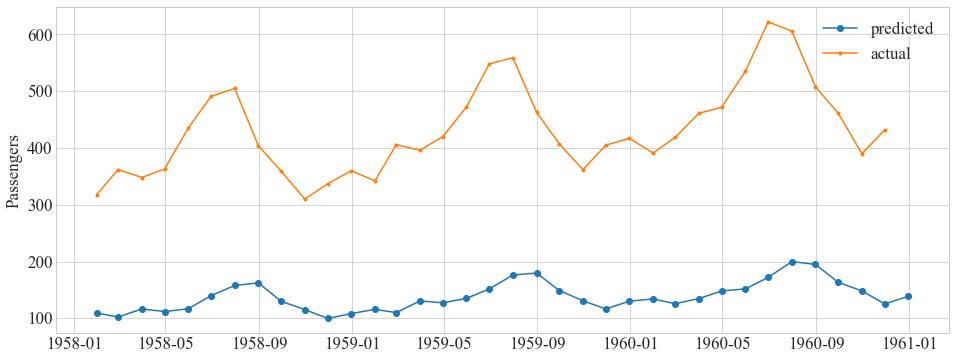

In [18]:
show_result(y_test, predicted)

In [24]:
passengers["month"] = passengers.index.month.values
passengers["year"] = passengers.index.year.values

model = create_model(passengers)
X_train, X_test, y_train, y_test = train_test_split(passengers, passengers.passengers.shift(-1), shuffle=False)
model.fit(X_train, y_train, epochs=100, callbacks=[callback])
predicted = model.predict(X_test)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 195644.7188 - root_mean_squared_error: 442.3174 - mean_absolute_error: 404.1221
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 217109.8281 - root_mean_squared_error: 465.9505 - mean_absolute_error: 426.9294
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 178128.0156 - root_mean_squared_error: 422.0522 - mean_absolute_error: 381.3656
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 212546.0312 - root_mean_squared_error: 461.0272 - mean_absolute_error: 404.6420
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 169220.3281 - root_mean_squared_error: 411.3640 - mean_absolute_error: 372.1913
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 151951.4375 - root_mean_squared_error: 389.8095 - mean_absolute_error: 349.9424
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 143473.8594 - root_mean

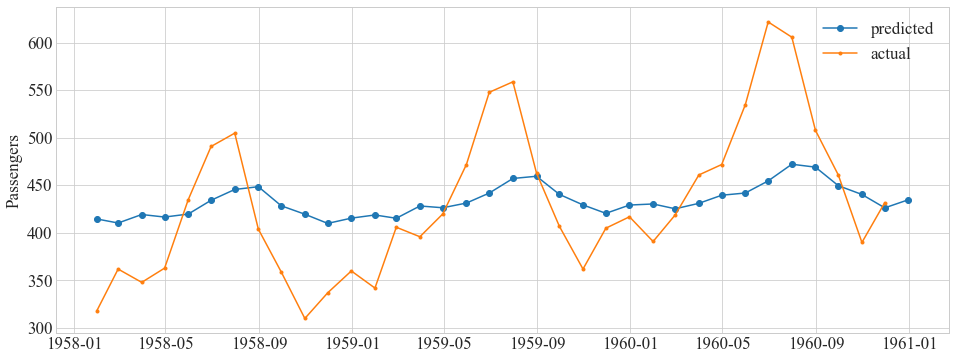

In [25]:
show_result(y_test, predicted)

In [298]:
from tensorflow.keras.layers.experimental import preprocessing
import tensorflow as tf


DROPOUT_RATIO = 0.1
HIDDEN_NEURONS = 5


def create_model(passengers):
  scale = tf.constant(passengers.passengers.std())

  continuous_input_layer = keras.layers.Input(shape=1)

  categorical_input_layer = keras.layers.Input(shape=1)
  embedded = keras.layers.Embedding(12, 5)(categorical_input_layer)
  embedded_flattened = keras.layers.Flatten()(embedded)

  year_input = keras.layers.Input(shape=1)
  year_layer = keras.layers.Dense(1)(year_input)

  hidden_output = keras.layers.Concatenate(-1)([embedded_flattened, year_layer, continuous_input_layer])
  output_layer = keras.layers.Dense(1)(hidden_output)
  output = output_layer * scale + continuous_input_layer

  model = keras.models.Model(inputs=[
    continuous_input_layer, categorical_input_layer, year_input
  ], outputs=output)

  model.compile(loss='mse', optimizer=keras.optimizers.Adam(),
    metrics=[keras.metrics.RootMeanSquaredError(), keras.metrics.MeanAbsoluteError()])
  return model

In [311]:
passengers = pd.Series(values, index=idx, name="passengers").to_frame()
passengers["year"] = passengers.index.year.values - passengers.index.year.values.min()
passengers["month"] = passengers.index.month.values - 1

X_train, X_test, y_train, y_test = train_test_split(passengers, passengers.passengers.shift(-1), shuffle=False)
model = create_model(X_train)
model.fit(
  (X_train["passengers"], X_train["year"], X_train["month"]),
  y_train, epochs=1000,
  callbacks=[callback, tensorboard_callback]
)
predicted = model.predict((X_test["passengers"], X_test["year"], X_test["month"]))

Epoch 1/1000
4/4 [==============================] - 1s 21ms/step - loss: 116548656.0000 - root_mean_squared_error: 10795.7705 - mean_absolute_error: 10102.7979
Epoch 2/1000
4/4 [==============================] - 0s 3ms/step - loss: 114627880.0000 - root_mean_squared_error: 10706.4414 - mean_absolute_error: 10019.0791
Epoch 3/1000
4/4 [==============================] - 0s 2ms/step - loss: 112753560.0000 - root_mean_squared_error: 10618.5479 - mean_absolute_error: 9936.6504
Epoch 4/1000
4/4 [==============================] - 0s 3ms/step - loss: 110907456.0000 - root_mean_squared_error: 10531.2607 - mean_absolute_error: 9853.9512
Epoch 5/1000
4/4 [==============================] - 0s 2ms/step - loss: 109055072.0000 - root_mean_squared_error: 10442.9434 - mean_absolute_error: 9771.2188
Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 107283320.0000 - root_mean_squared_error: 10357.7666 - mean_absolute_error: 9689.8291
Epoch 7/1000
4/4 [==============================]

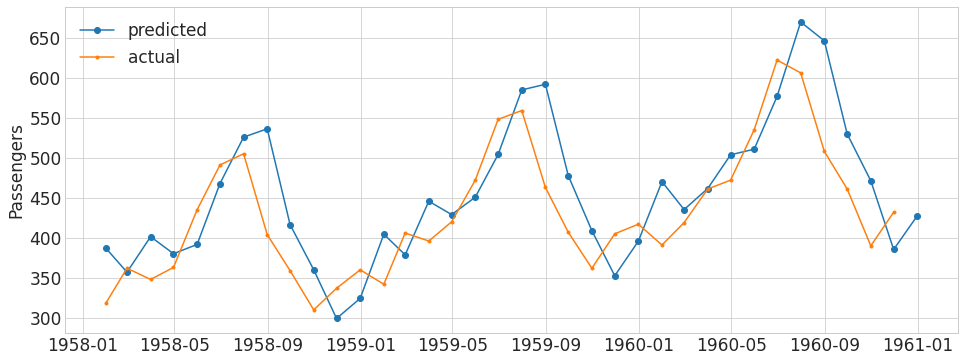

In [301]:
show_result(y_test, predicted)